<a href="https://colab.research.google.com/github/raumyadip/BHARAT_INTERN_ML/blob/main/House_price_prediction(task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = pd.DataFrame(data)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df=df[['LotArea','LotFrontage','TotalBsmtSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']]
df

,LotArea,LotFrontage,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,65.0,856,1710,1,0,2,1,3,208500
1,9600,80.0,1262,1262,0,1,2,0,3,181500
2,11250,68.0,920,1786,1,0,2,1,3,223500
3,9550,60.0,756,1717,1,0,1,0,3,140000
4,14260,84.0,1145,2198,1,0,2,1,4,250000
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,1647,0,0,2,1,3,175000
1456,13175,85.0,1542,2073,1,0,2,0,3,210000
1457,9042,66.0,1152,2340,0,0,2,0,4,266500
1458,9717,68.0,1078,1078,1,0,1,0,2,142125


In [7]:
df.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
SalePrice         0
dtype: int64

In [8]:
df.fillna(df.mean(), inplace=True)

<ipython-input-8-bf934754a5b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


In [9]:
df.describe()

,LotArea,LotFrontage,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,9981.264932,22.024023,438.705324,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,1300.000000,21.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,60.000000,795.750000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,9478.500000,70.049958,991.500000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,11601.500000,79.000000,1298.250000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,215245.000000,313.000000,6110.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [10]:
df.shape

(1460, 10)

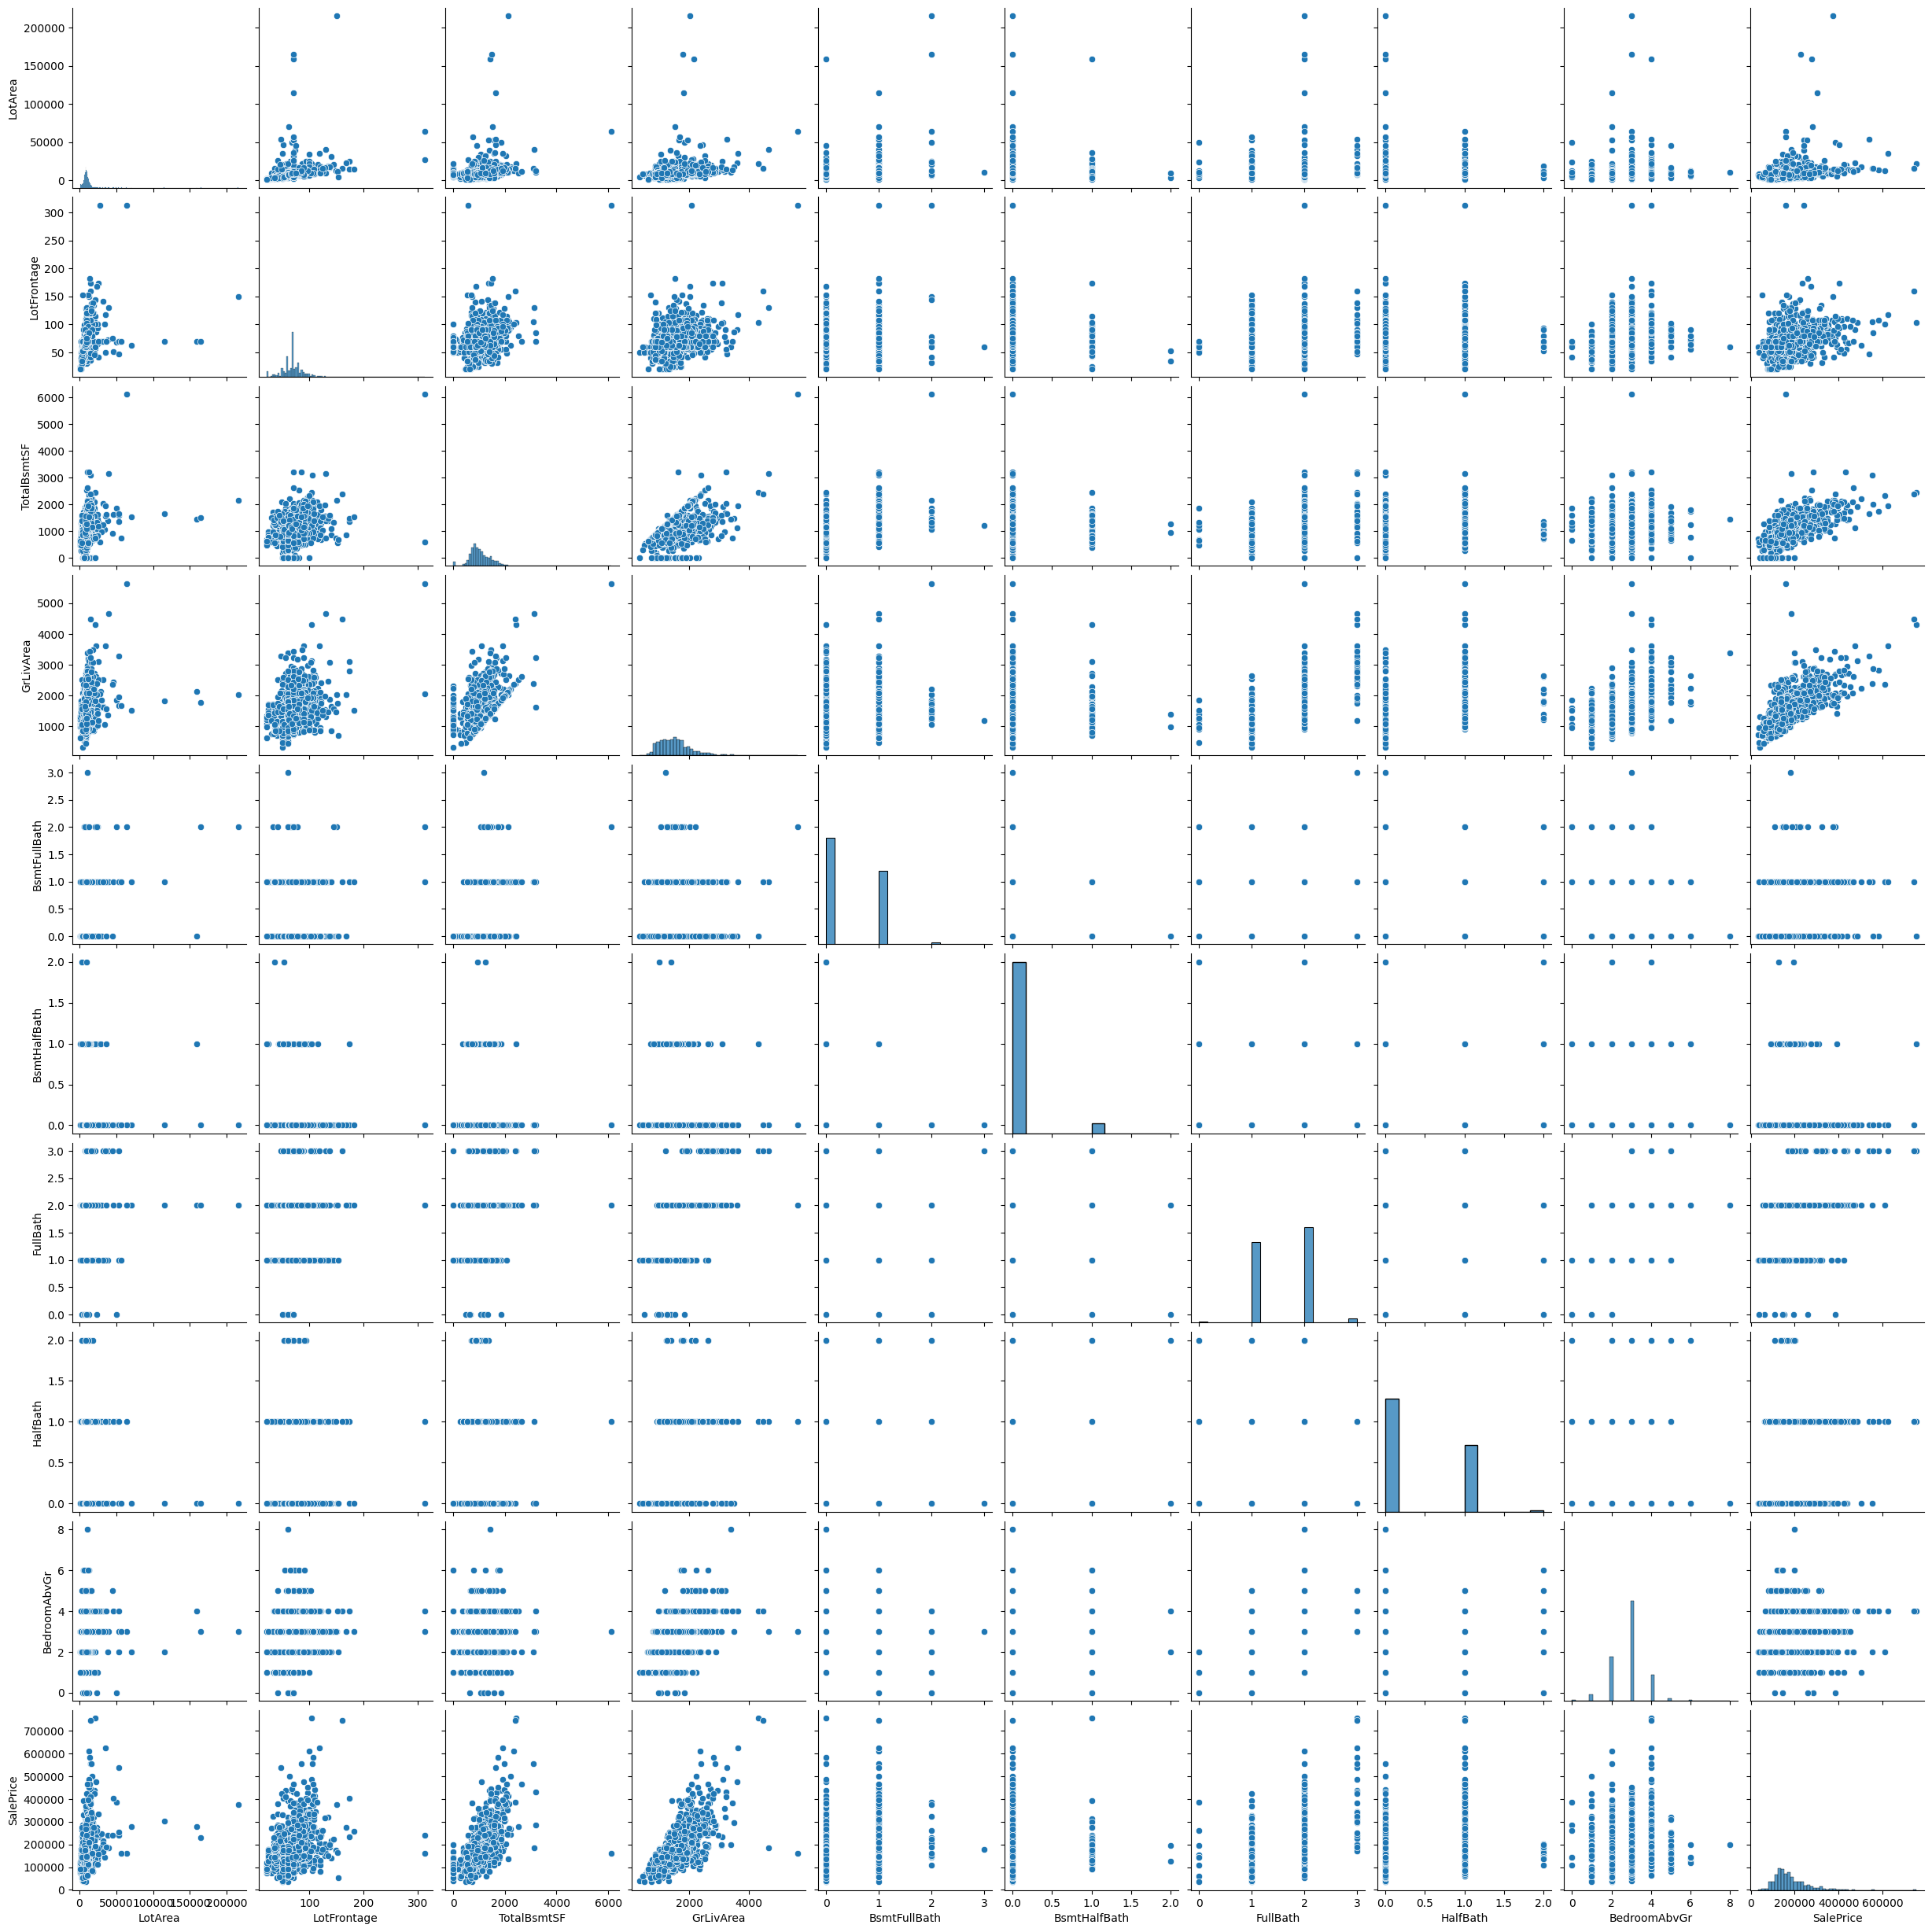

In [11]:
sns.pairplot(df)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']

In [14]:
X

,LotArea,LotFrontage,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,8450,65.0,856,1710,1,0,2,1,3
1,9600,80.0,1262,1262,0,1,2,0,3
2,11250,68.0,920,1786,1,0,2,1,3
3,9550,60.0,756,1717,1,0,1,0,3
4,14260,84.0,1145,2198,1,0,2,1,4
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,1647,0,0,2,1,3
1456,13175,85.0,1542,2073,1,0,2,0,3
1457,9042,66.0,1152,2340,0,0,2,0,4
1458,9717,68.0,1078,1078,1,0,1,0,2


In [15]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=54)

In [17]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
223,10500,70.000000,864,864,0,0,1,0,2
745,8963,70.049958,1142,2715,0,1,3,1,4
1300,10762,70.049958,978,1983,0,0,2,1,3
505,7596,60.000000,960,1960,0,0,2,0,4
158,12552,100.000000,991,1947,0,0,2,1,3
...,...,...,...,...,...,...,...,...,...
1344,11103,85.000000,728,1456,0,0,2,1,3
1047,9245,57.000000,990,990,0,1,1,0,3
898,12919,100.000000,2330,2364,1,0,2,1,2
1349,5250,50.000000,684,2358,0,0,2,0,4


In [18]:
y_train

223      97000
745     299800
1300    225000
505     124500
158     254900
         ...  
1344    155835
1047    145000
898     611657
1349    122000
1135    102000
Name: SalePrice, Length: 1168, dtype: int64

In [19]:
X_test

,LotArea,LotFrontage,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
882,9636,70.049958,808,1593,0,0,2,1,3
1058,11308,96.000000,1104,2184,1,0,2,1,3
1081,7500,75.000000,1040,1040,1,0,1,1,3
894,7018,64.000000,0,1535,0,0,2,0,4
954,9400,35.000000,945,980,0,2,2,0,4
...,...,...,...,...,...,...,...,...,...
1400,6000,50.000000,862,1158,0,0,1,0,3
858,10400,80.000000,1090,1370,0,0,2,0,3
1245,12090,78.000000,585,1868,0,0,3,1,3
1333,7200,60.000000,803,1360,0,0,1,1,2


In [20]:
y_test

882     178000
1058    335000
1081    133000
894     118858
954     127500
         ...  
1400    120000
858     152000
1245    178000
1333    125500
1414    207000
Name: SalePrice, Length: 292, dtype: int64

In [21]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3460438252.8983207
Root Mean Squared Error: 58825.48982285078
R^2 Score: 0.36491761837986303


In [24]:
print("Accuracy of the Model",model.score(X_test, y_test)*100)

Accuracy of the Model 36.4917618379863


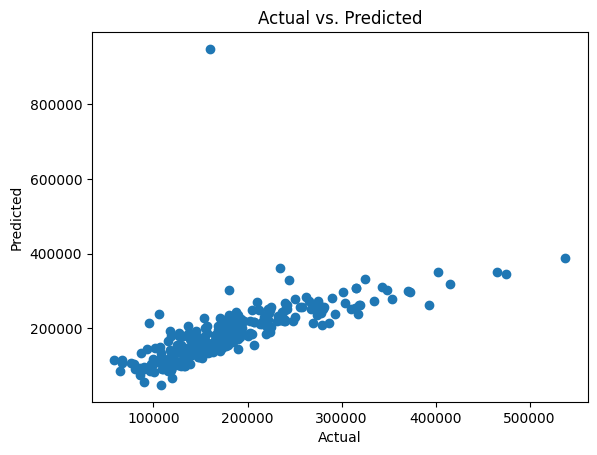

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [26]:
new_data = {
    'LotArea': [11103],
    'LotFrontage': [85.0],
    'TotalBsmtSF': [728],
    'GrLivArea': [1456],
    'BsmtFullBath': [0],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [3]
}

In [27]:
new=pd.DataFrame(new_data)
prediction = model.predict(new)
print('Prediction of sales price based on the new data:', prediction)

Prediction of sales price based on the new data: [174029.9575119]
